# Домашнее задание №2

Тема "Доверительные интервалы"

Общие положения:
- Макс кол-во баллов за ДЗ - 25 баллов
- Качество оформления и кода играет роль

Список заданий:
1.



In [ ]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [ ]:
# задаём стандартное нормальное распределение
norm_distr = stats.norm(loc=0, scale=1)

# рассчитываем квантиль по заданному уровню значимости
alpha = 0.05
z = norm_distr.ppf(1 - alpha/2)
print(z)

1.959963984540054


## Задание 1  
Компания утверждает, что длина шнурков в партии обуви имеет среднее значение 120 см, и стандартное отклонение в партии точно известно и составляет 5 см. Из выборки 25 шнурков было получено среднее значение длины 122 см. Найдите 99%-ый доверительный интервал для среднего значения длины шнурков (1 балл)

In [ ]:
# Вводные данные
mean_length = 120
std = 5

sample_size = 25
sample_mean_length = 122

alpha = 0.01

# Число, меньше которого 99,95% точек в нормальном распределении; Percent point function
z = norm_distr.ppf(1 - alpha/2)

# Вычисляем границы доверительного интервала
left = sample_mean_length - z * std/np.sqrt(sample_size)
right = sample_mean_length + z * std/np.sqrt(sample_size)

print(f"Левая и правая границы доверительного интервала: {left}, {right}")

Левая и правая границы доверительного интервала: 119.4241706964511, 124.5758293035489


##Задание 2
Компания исследует среднее время выполнения заказа курьерской службой. Было случайным образом выбрано 10 заказов, для которых среднее время доставки составило 45 минут, а выборочная дисперсия — 9 минут. Постройте 95%-ый доверительный интервал для среднего времени доставки заказа (1 балл)

In [ ]:
n = 10
sample_mean = 45
sample_std = 9
alpha = 0.05

# Понимаем, что в данной задаче у нас нет дисперсии генеральной совокупности
# Нахождение критического значения t-распределения

t_critical = stats.t.ppf(1 - alpha/2, n - 1)
left = sample_mean - t_critical*np.sqrt(sample_std/n)
right = sample_mean + t_critical*np.sqrt(sample_std/n)

print(f"Левая и правая границы доверительного интервала: {left}, {right}")


Левая и правая границы доверительного интервала: 42.85392928203498, 47.14607071796502


## Задание 3
Интернет-магазин хочет определить долю пользователей, которые возвращаются для повторной покупки в течение месяца после первой покупки. Для этого он проанализировал выборку из 800 клиентов, и оказалось, что 240 из них сделали повторную покупку в течение месяца. Необходимо определить 95% доверительный интервал для истинной доли клиентов, которые возвращаются для повторной покупки в течение этого времени (1 балл)


In [ ]:
alpha = 0.05
consumers = 800
active_consumers = 240

p = active_consumers/consumers
z = norm_distr.ppf(1 - alpha/2)

left = p - z*np.sqrt(p*(1-p)/consumers)
right = p + z*np.sqrt(p*(1-p)/consumers)

print(f"Левая и правая границы доверительного интервала для доли: {left}, {right}")


Левая и правая границы доверительного интервала для доли: 0.2682449540949441, 0.3317550459050559


## Задание 4
Два студента Тимофей и Пётр решают задачи из учебника по статистике, каждый со своей усердностью λ (количество решенных задач в день).
Тимофей считает себя более усердным студентом. Необходимо построить доверительный для разности λ1 - λ2 и проверить, правда ли это.
Студенты решают задачи независимо друг от друга (1 балл)

In [ ]:
a = [7, 5, 2, 8, 4, 9, 2, 6, 6, 7] # Тимофей
b = [3, 3, 3, 9, 9, 2, 2, 2, 2, 9] # Пётр

alpha = 0.05

tima_mean = np.mean(a)
peter_mean = np.mean(b)

var_a = np.var(a, ddof=1)
var_b = np.var(b, ddof=1)

# Объединенная дисперсия
n = len(a)
m = len(b)
pooled_var = ((n - 1) * var_a + (m - 1) * var_b) / (n + m - 2)

diff_se = np.sqrt(pooled_var * (1/n + 1/m))

t_critical = stats.t.ppf(1 - alpha/2, n + m - 2)

difference = tima_mean - peter_mean
left = difference - t_critical * diff_se
right = difference + t_critical * diff_se

print(f"Левая и правая границы доверительного интервала: {left}, {right}")

Левая и правая границы доверительного интервала: -1.4463835370337859, 3.8463835370337844


Ввиду того, что число 0 входит в доверительный интервал, то мы не можем утверждать, что между этими средними есть разница. Т.е. Тимофей все-таки хвастунишка и статистически он не столь уж усерднее Петра, хоть и есть бОльший сдвиг в его сторону.

## Задания 5-8 (5 баллов всего)

In [ ]:
!curl -O https://raw.githubusercontent.com/practical-jupyter/sample-data/refs/heads/master/anime/anime.csv >> anime.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  778k  100  778k    0     0  1814k      0 --:--:-- --:--:-- --:--:-- 1811k


Описание датафрейма:
- `anime_id` - ID
- `name` - название
- `genre` - жанр (строка с пречисление через запятую)
- `type` - формат
- `episodes` - кол-во эпизодов
- `rating` - средний рейтинг
- `members` - кол-во смотрящих

In [ ]:
df_anime = pd.read_csv('anime.csv')
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10486 entries, 0 to 10485
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  10486 non-null  int64  
 1   name      10486 non-null  object 
 2   genre     10424 non-null  object 
 3   type      10463 non-null  object 
 4   episodes  10486 non-null  object 
 5   rating    10275 non-null  float64
 6   members   10486 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 573.6+ KB


## 5. Постройте доверительный интервал для среднего рейтинга по всем аниме (1 балл)

In [ ]:
alpha = 0.05
mean_rating = df_anime['rating'].mean()
std_rating = df_anime['rating'].std()
n = df_anime.shape[0]

# Имеем дело не с генеральной совокупностью, поэтому не знаем дисперсию (в датафрейме не все аниме в мире, ясное дело)
# Нахождение критического значения t-распределения

t_critical = stats.t.ppf(1 - alpha/2 , n-1)
left = mean_rating - t_critical*std_rating/np.sqrt(n)
right = mean_rating + t_critical*std_rating/np.sqrt(n)

print(f"Левая и правая границы доверительного интервала: {left}, {right}")

Левая и правая границы доверительного интервала: 6.473482586544639, 6.514314980365336


## 6. Постройте доверительные интервалы для средних рейтингов по жанрам  (1 балл)

In [ ]:
alpha = 0.05

df_decomposed = df_anime.copy()
df_decomposed['genre'] = df_anime['genre'].str.split(', ')
df_decomposed = df_decomposed.explode('genre')
unique_genres = df_decomposed['genre'].dropna().unique()

genre_rating_mean = df_decomposed.groupby('genre')['rating'].mean()
genre_rating_std = df_decomposed.groupby('genre')['rating'].std()
genre_count = df_decomposed.groupby('genre').size()
genre_dictionary = {}

for genre in sorted(unique_genres):
  mean_rating = genre_rating_mean[genre]
  std_rating = genre_rating_std[genre]

  t_critical = stats.t.ppf(1 - alpha/2 , genre_count[genre] - 1)

  left = mean_rating - t_critical*std_rating/np.sqrt(genre_count[genre])
  right = mean_rating + t_critical*std_rating/np.sqrt(genre_count[genre])

  genre_dictionary[genre] = [left, right]

for genre, interval in genre_dictionary.items():
    print(f"Жанр: {genre}")
    print(f"Доверительный интервал для среднего рейтинга по жанру: [{interval[0]:.2f}, {interval[1]:.2f}]")
    print("------------------------------------------")


Жанр: Action
Доверительный интервал для среднего рейтинга по жанру: [6.77, 6.84]
------------------------------------------
Жанр: Adventure
Доверительный интервал для среднего рейтинга по жанру: [6.71, 6.78]
------------------------------------------
Жанр: Cars
Доверительный интервал для среднего рейтинга по жанру: [6.19, 6.75]
------------------------------------------
Жанр: Comedy
Доверительный интервал для среднего рейтинга по жанру: [6.59, 6.65]
------------------------------------------
Жанр: Dementia
Доверительный интервал для среднего рейтинга по жанру: [4.84, 5.14]
------------------------------------------
Жанр: Demons
Доверительный интервал для среднего рейтинга по жанру: [6.61, 6.89]
------------------------------------------
Жанр: Drama
Доверительный интервал для среднего рейтинга по жанру: [6.95, 7.03]
------------------------------------------
Жанр: Fantasy
Доверительный интервал для среднего рейтинга по жанру: [6.64, 6.71]
------------------------------------------
Жанр:

## 7. Постройте доверительные интервалы среднего рейтинга по типам аниме (1 балл)

In [ ]:
alpha = 0.05

type_rating_mean = df_anime.groupby('type')['rating'].mean()
type_rating_std = df_anime.groupby('type')['rating'].std()
type_count = df_anime.groupby('type').size()
unique_types = df_anime['type'].dropna().unique()

type_dictionary = {}

for unique_type in unique_types:
  mean_rating = type_rating_mean[unique_type]
  std_rating = type_rating_std[unique_type]

  t_critical = stats.t.ppf(1 - alpha/2 , type_count[unique_type] - 1)

  left = mean_rating - t_critical*std_rating/np.sqrt(type_count[unique_type])
  right = mean_rating + t_critical*std_rating/np.sqrt(type_count[unique_type])

  type_dictionary[unique_type] = [left, right]

print(f"{'Type':<10} {'Left':<10} {'Right':<10}")
print("-" * 30)
for unique_type, (left, right) in type_dictionary.items():
    print(f"{unique_type:<10} {left:<10.2f} {right:<10.2f}")


Type       Left       Right     
------------------------------
Movie      6.26       6.36      
TV         6.90       6.96      
OVA        6.43       6.52      
Special    6.48       6.57      
Music      5.50       5.67      
ONA        5.53       5.71      


## 8. По доверительным интервалам для episodes, rating и members оцените количество аномалий (2 балла)

In [ ]:
alpha = 0.05
n = df_anime.shape[0]
df_anime['episodes'] = pd.to_numeric(df_anime['episodes'], errors='coerce')
df_anime['episodes'] = df_anime['episodes'].astype('Int32')
df_anime = df_anime.dropna(subset=['episodes', 'rating', 'members'])


episodes_mean = df_anime['episodes'].mean()
rating_mean = df_anime['rating'].mean()
members_mean = df_anime['members'].mean()

episodes_std = df_anime['episodes'].std()
rating_std = df_anime['rating'].std()
members_std = df_anime['members'].std()

t_critical = stats.t.ppf(1 - alpha/2 , n - 1)

left_episodes = episodes_mean - t_critical*episodes_std / np.sqrt(n)
right_episodes = episodes_mean + t_critical*episodes_std / np.sqrt(n)

df_anomaly_episodes = df_anime.loc[(df_anime['episodes'] < left_episodes) | (df_anime['episodes'] > right_episodes)]
print('Процент аниме, где количество эпизодов выходит за доверительный интервал среднего количества по выборке', df_anomaly_episodes.shape[0]/n)

left_rating = rating_mean - t_critical*rating_std / np.sqrt(n)
right_rating = rating_mean + t_critical*rating_std / np.sqrt(n)

df_anomaly_rating = df_anime.loc[(df_anime['rating'] < left_rating) | (df_anime['rating'] > right_rating)]
print('Процент аниме, где рейтинг выходит за доверительный интервал среднего рейтинга по выборке', df_anomaly_rating.shape[0]/n)

left_members = members_mean - t_critical*members_std / np.sqrt(n)
right_members = members_mean + t_critical*members_std / np.sqrt(n)

df_anomaly_members = df_anime.loc[(df_anime['members'] < left_members) | (df_anime['members'] > right_members)]
print('Процент аниме, где количество фанатов выходит за доверительный интервал среднего количества фанатов по выборке по выборке', df_anomaly_members.shape[0]/n)

Процент аниме, где количество эпизодов выходит за доверительный интервал среднего количества по выборке 0.9116917795155446
Процент аниме, где рейтинг выходит за доверительный интервал среднего рейтинга по выборке 0.9472630173564753
Процент аниме, где количество фанатов выходит за доверительный интервал среднего количества фанатов по выборке по выборке 0.9547015067709327


## Задания 9-15. Продуктовые метрики (16 баллов всего)

In [ ]:
!curl -O https://raw.githubusercontent.com/alina-zhu/datasets/refs/heads/master/customer_shopping_data.csv >> customer_shopping_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6410k  100 6410k    0     0  10.1M      0 --:--:-- --:--:-- --:--:-- 10.1M


Описание датафрейма:
- `invoice_no` - номер чека
- `customer_id` - id клиента
- `gender` - пол клиента
- `age` - возраст клиента
- `category` - категория товара
- `quantity` - количество единиц товаров в чеке
- `price` - цена товара
- `payment_method` - метод оплаты
- `invoice_date` - дата покупки


In [ ]:
df = pd.read_csv('customer_shopping_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 6.8+ MB


In [ ]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date
0,I138884,upeszhn26j,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05
1,I317333,nyyoavbmge,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12
2,I127801,iksbmqrtj0,Male,20,Clothing,1,300.08,Cash,2021-11-09
3,I173702,zfhc107gzu,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16
4,I337046,diwrquryyt,Female,53,Books,4,60.60,Cash,2021-10-24


## 9. Посчитайте доверительный интервал для среднего возраста покупателей (1 балл)

In [ ]:
alpha = 0.05

age_mean = df['age'].mean()
age_std = df['age'].std()
n = df.shape[0]

t_critical = stats.t.ppf(1 - alpha/2, n - 1)
left = age_mean - t_critical*np.sqrt(age_std**2/n)
right = age_mean + t_critical*np.sqrt(age_std**2/n)

print(f"Левая и правая границы доверительного интервала для среднего возраста покупателей: {left}, {right}")


Левая и правая границы доверительного интервала для среднего возраста покупателей: 43.33392707517726, 43.52025111238119


## 10. Посчитайте доверительные интервалы для среднего чека в каждой категории (1 балл)

In [ ]:
category_check_mean = df.groupby('category')['price'].mean()
category_check_std = df.groupby('category')['price'].std()
category_count = df.groupby('category').size()
unique_categories = df['category'].unique()

category_dictionary = {}

for unique_category in unique_categories:
  mean_check = category_check_mean[unique_category]
  std_check = category_check_std[unique_category]

  t_critical = stats.t.ppf(1 - alpha/2 , category_count[unique_category] - 1)

  left = mean_check - t_critical*std_check/np.sqrt(category_count[unique_category])
  right = mean_check + t_critical*std_check/np.sqrt(category_count[unique_category])

  category_dictionary[unique_category] = [left, right]


for method, interval in category_dictionary.items():
    print(f"Метод оплаты: {method}")
    print(f"Доверительный интервал для среднего чека: [{interval[0]:.2f}, {interval[1]:.2f}]")
    print("------------------------------------------")


Метод оплаты: Clothing
Доверительный интервал для среднего чека: [896.61, 905.56]
------------------------------------------
Метод оплаты: Shoes
Доверительный интервал для среднего чека: [1790.85, 1823.93]
------------------------------------------
Метод оплаты: Books
Доверительный интервал для среднего чека: [44.97, 46.17]
------------------------------------------
Метод оплаты: Cosmetics
Доверительный интервал для среднего чека: [121.53, 123.37]
------------------------------------------
Метод оплаты: Food & Beverage
Доверительный интервал для среднего чека: [15.55, 15.79]
------------------------------------------
Метод оплаты: Toys
Доверительный интервал для среднего чека: [106.75, 108.72]
------------------------------------------
Метод оплаты: Technology
Доверительный интервал для среднего чека: [3115.84, 3198.03]
------------------------------------------
Метод оплаты: Souvenir
Доверительный интервал для среднего чека: [34.44, 35.35]
------------------------------------------


## 11. Посчитайте доверительные интервалы для среднего чека для каждого типа оплаты (1 балл)

In [ ]:
payment_check_mean = df.groupby('payment_method')['price'].mean()
payment_check_std = df.groupby('payment_method')['price'].std()
payment_count = df.groupby('payment_method').size()
unique_payments = df['payment_method'].unique()

payments_dictionary = {}

for unique_payment in unique_payments:
  mean_check = payment_check_mean[unique_payment]
  std_check = payment_check_std[unique_payment]

  t_critical = stats.t.ppf(1 - alpha/2 , payment_count[unique_payment] - 1)

  left = mean_check - t_critical*std_check/np.sqrt(payment_count[unique_payment])
  right = mean_check + t_critical*std_check/np.sqrt(payment_count[unique_payment])

  payments_dictionary[unique_payment] = [left, right]

print(payments_dictionary)

{'Credit Card': [678.6523735560427, 698.4325613155613], 'Debit Card': [674.0985861160312, 699.9596837181238], 'Cash': [682.0602071901642, 699.5867422102453]}


## 12. Посчитайте доверительный интервал для среднего количества позиций в чеке (1 балл)

In [ ]:
alpha = 0.05

quantity_mean = df['quantity'].mean()
quantity_std = df['quantity'].std()
n = df.shape[0]

t_critical = stats.t.ppf(1 - alpha/2, n - 1)
left = quantity_mean - t_critical*np.sqrt(quantity_std**2/n)
right = quantity_mean + t_critical*np.sqrt(quantity_std**2/n)

print(f"Левая и правая границы доверительного интервала для среднего количества позиций в чеке: {left}, {right}")

Левая и правая границы доверительного интервала для среднего количества позиций в чеке: 2.9946467760678455, 3.012210458717037


## 13. Посчитайте доверительный для среднего количества покупателей в день (1 балл)

In [ ]:
# учитываем, что один и тот же покупатель может прийти несколько раз в день
daily_stats = df.groupby('invoice_date').agg({
    'customer_id': 'nunique'
}).reset_index()

mean_customers = daily_stats['customer_id'].mean()
std_customers = daily_stats['customer_id'].std()
n = daily_stats.shape[0]

t_critical = stats.t.ppf(1 - alpha/2, n - 1)
left = mean_customers - t_critical*np.sqrt(std_customers**2/n)
right = mean_customers + t_critical*np.sqrt(std_customers**2/n)

print(f"Левая и правая границы доверительного интервала для среднего количества покупателей в день: {left}, {right}")

Левая и правая границы доверительного интервала для среднего количества покупателей в день: 123.91153976539648, 125.4284853287064




## 14. Посчитайте помесячный retention для пользователей и доверительные интервалы для него (6 баллов)
Day N Retention = (Users Day N / Users Day 0) * 100

1) Постройте график retention   
2) Добавьте на график область доверительного интервала для каждого месяца

Сначала нам нужно взять нулевой месяц (он может быть любым). Затем смотрим в следующих месяцах смотрим, как к нам возвращаются пользователи. Считать надо честный ретеншн (т.е. как я понял, не учитываем, что к нам пришли новые пользователи).
- Вычислим количество уникальных пользователей за месяц
- Далее делаем то же самое, но смотреть нужно еще на пересечение айдишников с прошлым (нулевым) месяцем.



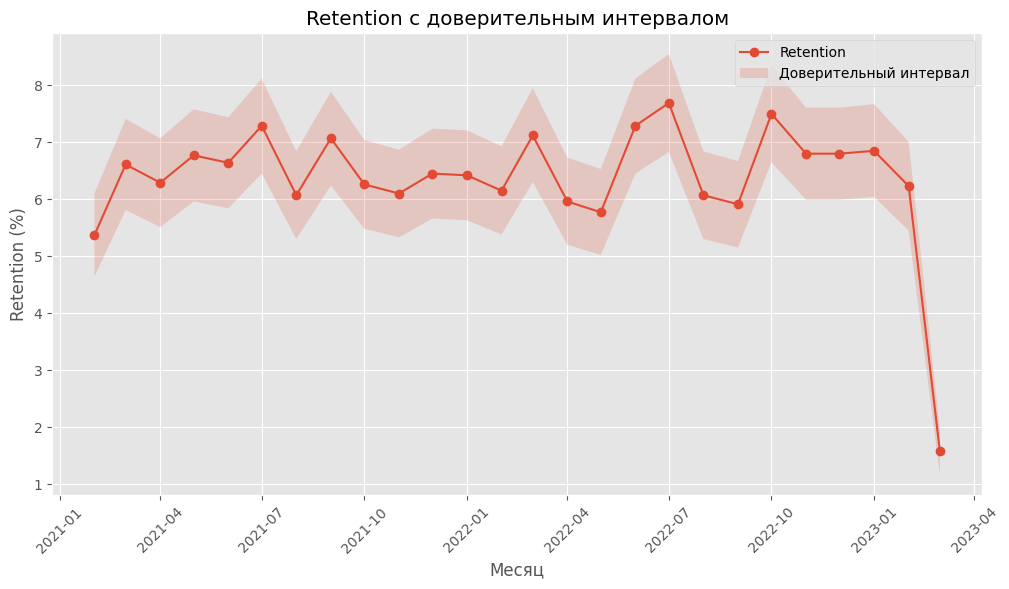

In [ ]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df = df.sort_values('invoice_date')

df_zero_month = df.loc[df['invoice_date'] < '2021-02-01']
zero_month_unique_ids = df_zero_month['customer_id'].unique()
users_zero_month = len(zero_month_unique_ids)

all_months = pd.date_range(start=df['invoice_date'].min(), end=df['invoice_date'].max(), freq='MS')

retention_data = {}

alpha = 0.05
z = norm_distr.ppf(1 - alpha/2)


for i in range(1, len(all_months)):
  start_date = all_months[i]
  end_date = start_date + pd.DateOffset(months=1)
  df_current_month = df.loc[(df['invoice_date'] >= start_date) & (df['invoice_date'] < end_date)]
  current_month_unique_ids = df_current_month['customer_id'].unique()

  current_month_intersected_ids = np.intersect1d(current_month_unique_ids, zero_month_unique_ids)
  users_current_month = len(current_month_intersected_ids)
  current_month_retention = (users_current_month/users_zero_month) * 100

  p = current_month_retention / 100
  se = np.sqrt(p * (1 - p) / users_zero_month)
  left = (p - z * se) * 100
  right = (p + z * se) * 100

  retention_data[start_date] = [round(current_month_retention, 2), round(left, 2), round(right, 2)]


retention_df = pd.DataFrame(list(retention_data.items()), columns=['month', 'retention_data'])
retention_df[['retention', 'left', 'right']] = pd.DataFrame(retention_df['retention_data'].tolist(), index=retention_df.index)

plt.figure(figsize=(12, 6))

plt.plot(retention_df['month'], retention_df['retention'], marker='o', label='Retention')

plt.fill_between(retention_df['month'], retention_df['left'], retention_df['right'], alpha=0.2, label='Доверительный интервал')

plt.title('Retention с доверительным интервалом')
plt.xlabel('Месяц')
plt.ylabel('Retention (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()





Вероятно, что за последний месяц retention очень мал, так как данные были собраны не за весь месяц, а, например, за треть

## 15. Посчитайте средний доход с пользователя (ARPU) в каждом месяце и доверительные интервалы для него (5 баллов)
ARPU = Average Revenue Per User  
1) Постройте график ARPU для каждого месяца      
2) Добавьте на график область доверительного интервала для каждого месяца

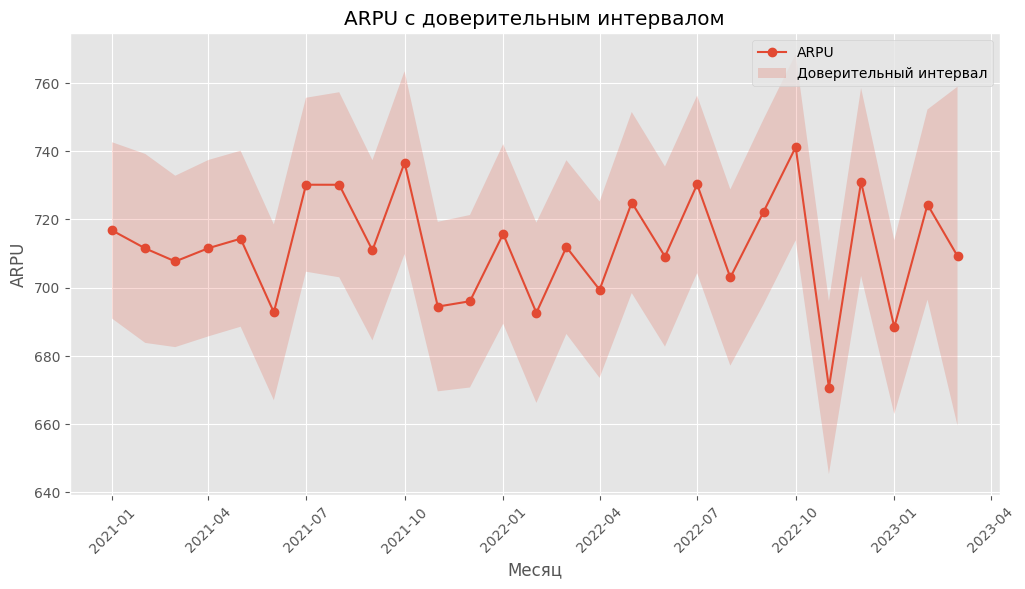

In [ ]:
# по каждому месяцу считаем уникальных клиентов, суммируем доходы
# за каждый месяц вычисляем соотношение: общий доход/количество клиентов
from scipy.stats import t

arpu_data = {}

for i in range(len(all_months)):
  start_date = all_months[i]
  end_date = start_date + pd.DateOffset(months=1)
  df_current_month = df.loc[(df['invoice_date'] >= start_date) & (df['invoice_date'] < end_date)]
  current_month_unique_ids = df_current_month['customer_id'].unique()

  sum_of_income = df_current_month['price'].sum()
  current_arpu = sum_of_income/len(current_month_unique_ids)

  std_dev = df_current_month.groupby('customer_id')['price'].sum().std()
  t_score = t.ppf(1 - alpha, len(current_month_unique_ids) - 1)
  se = std_dev / np.sqrt(len(current_month_unique_ids))
  left = current_arpu - t_score * se
  right = current_arpu + t_score * se

  arpu_data[start_date] = [round(current_arpu, 2), round(left, 2), round(right, 2)]


arpu_df = pd.DataFrame(list(arpu_data.items()), columns=['month', 'arpu_data'])
arpu_df[['arpu', 'left', 'right']] = pd.DataFrame(arpu_df['arpu_data'].tolist(), index=arpu_df.index)


plt.figure(figsize=(12, 6))

plt.plot(arpu_df['month'], arpu_df['arpu'], marker='o', label='ARPU')

plt.fill_between(arpu_df['month'], arpu_df['left'], arpu_df['right'], alpha=0.2, label='Доверительный интервал')

plt.title('ARPU с доверительным интервалом')
plt.xlabel('Месяц')
plt.ylabel('ARPU')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()
